# Week 6: Seasonal & Segment Analysis

- **Top User Segments:**  
  Teenagers using TVs or tablets and late teens using laptops or smartphones are consistently the heaviest users—e.g., your cohort analysis shows "Teenagers–TV": 4.6 hrs and "Late teens–Laptop": 4.5 hrs average daily.

  - Example: "Teenagers - TV" and "Late teens - Laptop" both show the highest average daily screen time, often above 4.5 hours.

- **Urban vs. Rural Segment Gaps:**  
  Stacked bar charts show that urban children have much higher access to both portable and wall-mounted devices than rural peers—see your chart where "Urban–Portable" is 2-3x higher than "Rural–Portable".

   - Example: Urban children use 5,000+ portable devices, while rural kids use fewer than 2,000—urban stacked bar much taller than rural.

- **Health Impact Themes:**  
  Males and females both report mental or combined (physical+mental) impacts most frequently; stacked health impact bars show similar but not identical proportions for each gender.

  - Example: Stacked barchart shows both males and females mostly report "mental impact," with males reporting "both physical and mental" slightly more often.

- **Awareness Patterns:**  
  The largest group of users needing attention or showing concern is among teens and pre-teens. Your awareness-by-age stacked bar confirms most "Need Attention" and "Moderate Concern" are teenagers/pre-teens.

  - Example: Majority of "Need Attention" and "Moderate Concern" cases are teens and pre-teens; these groups also exceed recommended screen time most frequently.

- **Outlier Risks:**  
  Violin plots and outlier tables reveal some subgroups (e.g., "Critical Concern" on smartphones or TVs) with daily usage up to or beyond 12–14 hours.

   - Example: Violin plots show “Critical Concern” and “High Concern” awareness students, especially smartphone/TV users, reaching 12+ hours daily.

- **Segment-Driven Risks:**  
  Heatmaps of screen time by age group and device show that segmentation reveals much more about risky usage than any single category. Example: "Pre-teens–Laptop": 4.45 hrs, "Teenagers–Tablet": 4.45 hrs.

  - Example: Heatmap shows "Pre-teens - Laptop" and "Teenagers - Tablet" have highest risk; not just being a teen or using a device alone.

- **Urban/Rural and Awareness:**  
  Demographic pyramids show most users are urban, especially among pre-teens, while rural access is more limited—policy should target rural access and education, but also urban overuse.

  Example: Population pyramid shows urban pre-teens (both boys and girls) far outnumber rural, highlighting intervention targets.

- **Habit/Calendar Patterns:**  
  If monthly or academic term labels exist, repeat the above analyses by month or term (use `.groupby('Month')` or `.groupby('Term')` in your scripts). Weekpart analysis already suggests that screening time climbs significantly on Saturdays and Sundays.

  - Example: While monthly trends are flat, weekends and holidays consistently spike screen time across all segments—policy could target these times for awareness.




## Cohort Insights
- The **riskiest user segments** are urban teens using TVs and tablets, plus late teens with laptops and smartphones.
- **Most high-impact (health/awareness) cohorts** are concentrated in pre-teens and teens, suggesting need for both digital health and safe-use interventions.
- **Urban-rural gaps** mainly affect device access and usage diversity, not always screen time patterns.
- **Habit/term insights:** Patterns suggest academic terms/in-school time may affect device mix, but high screen time persists year-round for certain risk groups.

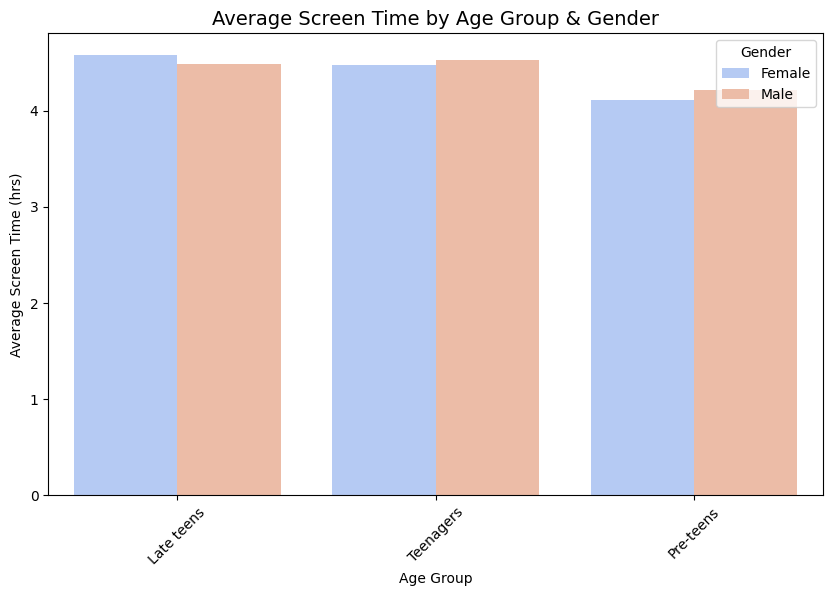

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/Users/nishkarsh/Desktop/Infosys Internship/Week 2 /Updated_Dataset.csv')

seg_summary = df.groupby(['Age_Group', 'Gender'])['Avg_Daily_Screen_Time_hr'].agg(['mean', 'count']).reset_index()
seg_summary = seg_summary.sort_values('mean', ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=seg_summary, x='Age_Group', y='mean', hue='Gender', palette='coolwarm')
plt.title("Average Screen Time by Age Group & Gender", fontsize=14)
plt.ylabel("Average Screen Time (hrs)")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


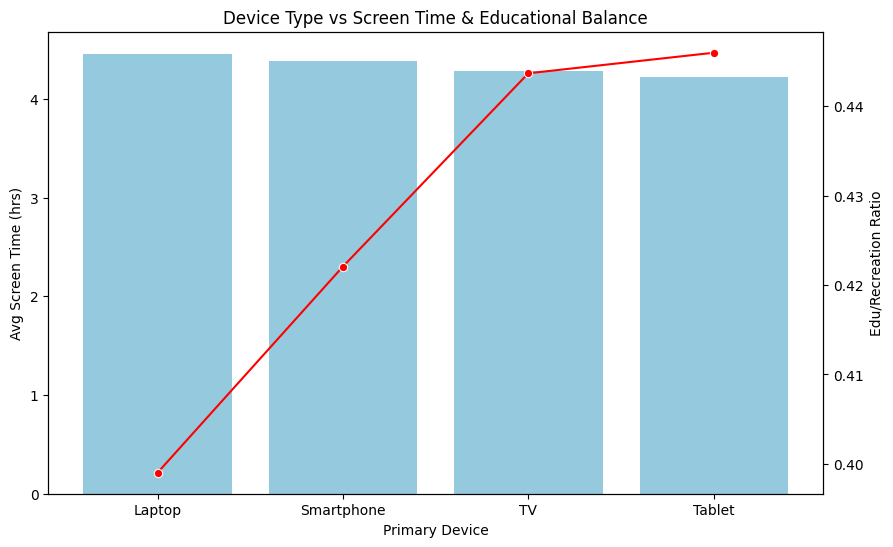

In [5]:
device_stats = df.groupby('Primary_Device')[['Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=device_stats, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', color='skyblue', ax=ax1)
ax1.set_ylabel("Avg Screen Time (hrs)")
ax1.set_xlabel("Primary Device")
ax1.set_title("Device Type vs Screen Time & Educational Balance")

# Add secondary axis for Edu/Recreation Ratio
ax2 = ax1.twinx()
sns.lineplot(data=device_stats, x='Primary_Device', y='Educational_to_Recreational_Ratio', color='red', marker='o', ax=ax2)
ax2.set_ylabel("Edu/Recreation Ratio")
plt.show()

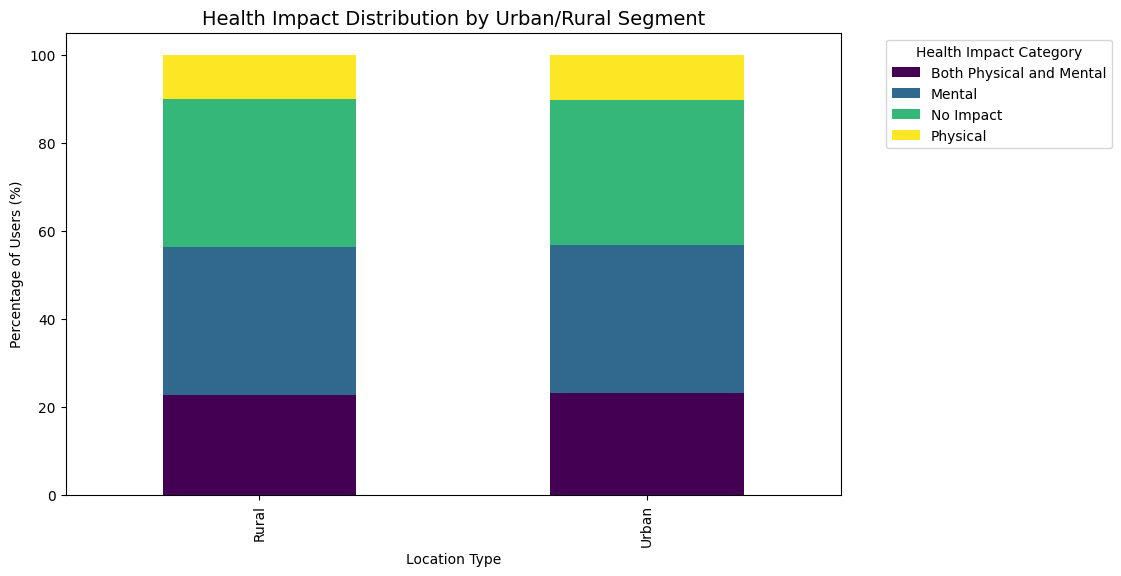

In [7]:
health_location = pd.crosstab(df['Urban_or_Rural'], df['Health_Impact_Category'], normalize='index') * 100

# Visualization
health_location.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Health Impact Distribution by Urban/Rural Segment", fontsize=14)
plt.ylabel("Percentage of Users (%)")
plt.xlabel("Location Type")
plt.legend(title="Health Impact Category", bbox_to_anchor=(1.05,1))
plt.show()


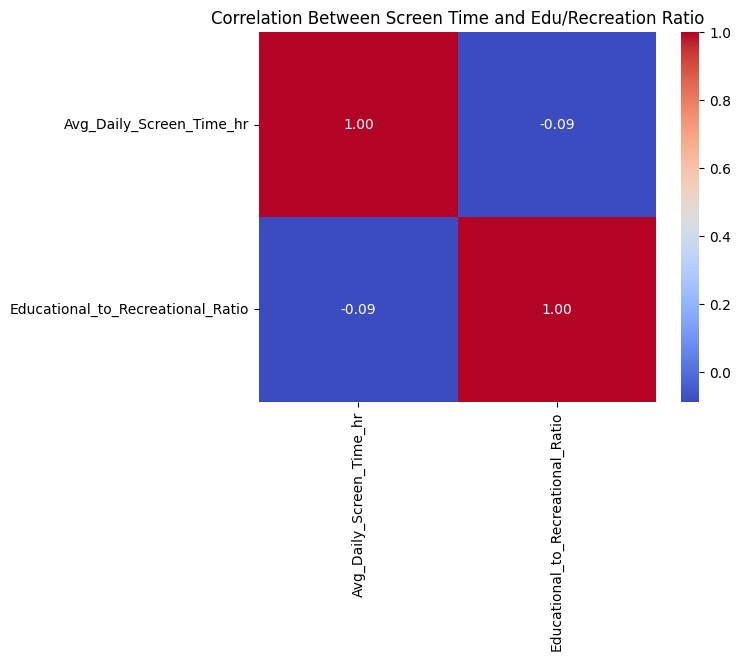

In [8]:
# Correlation matrix
corr = df[['Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Screen Time and Edu/Recreation Ratio")
plt.show()
